# 2.2 객체지향 퍼셉트론 API

- 퍼셉트론은 두 클래스가 선형적으로 구분되고 학습률이 충분히 작을 때만 수렴이 보장
- 두 클래스를 선형 결정 경계로 나눌 수 없다면 훈련 데이터셋을 반복할 최대 횟수(에포크)를 지정하고 분류 허용 오차 지정 가능
- 그렇지 않으면 퍼셉트론은 가중치 업데이트를 멈추지 않음

In [4]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """
        퍼셉트론 분류기

        eta (float): 학습률 ( 0.0 ~ 0.1 )
        n_iter (int): 훈련 데이터셋 반복 횟수
        random_state (int): 가중치 무작위 초기화를 위한 난수 생성기 시드

        w_ (1d-array): 학습된 가중치
        errors_ (list): 에포크마다 누적된 분류 오류
        """
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        훈련 데이터 학습

        X : n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : 타깃 값

        반환값 : self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


**__init__**
- 객체 초기화
- eta : 학습률
- n_iter : 에포크 횟수(훈련 데이터를 반복하는 횟수)

**fit**
- 데이터 학습
- 가중치를 초기화한 후 훈련 세트에 있는 모든 개개의 샘픔을 반복 순회하며 퍼셉트론 학습 규칙에 따라 가중치 업데이트

**predict**
- 예측 만들기
- 모델이 학습되고 난 후 새로운 데이터의 클래스 레이블을 예측하는데 사용
- [numpy where](https://pinkwink.kr/1236) : 조건 연산자

**net_input**
- [numpy dot](https://www.delftstack.com/ko/api/numpy/python-numpy-dot-function/) : 행렬의 곱

In [5]:
import pandas as pd
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


[pandas head tail](https://kongdols-room.tistory.com/107) : 데이터 앞 뒤 확인

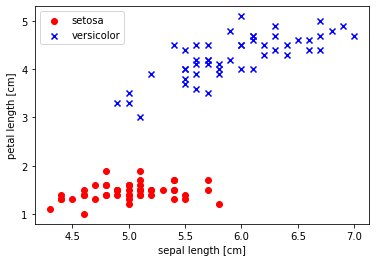

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# setosa와 versicolor 선택
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출
X = df.iloc[0:100, [0, 2]].values

# 산점도 그리기
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue',
            marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

- 꽃받침 길이와 꽃잎 길이 두 개의 특성을 축을 따라 분포된 형태를 보여줌
- 2차원 부분 공간에서는 선형 결정 경계로 Setosa와 Versicolor 꽃을 구분하기 충분할 것임
- 퍼셉트론 같은 선형 분류기가 이 데이터셋의 꽃을 완벽하게 분류할 것임

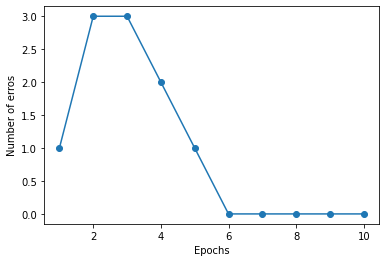

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of erros')
plt.show()

- 6번째 에포크 이후에 수렴
- 훈련 샘플을 완벽하게 분류

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 경계 결정 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샐픔의 산점도 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='black')

- 두 특성의 최솟값 최대값을 찾고 2d array로 생성
- 두 특성의 차원에서 퍼셉트론 분류기를 훈련했기 대문에 그리드 배열을 펼치고 훈련 데이터와 같은 개수의 열이 되도록 행렬 생성
- **predict Method**로 그리드 각 포인트에 대응하는 클래스 레이블 Z 예측
- [numpy meshgrid](https://seong6496.tistory.com/129) : 1차원 배열 2개를 2차원 배열로 만들기
- [numpy ravel](https://rfriend.tistory.com/349) : N차원 배열을 1차원 배열로 변환

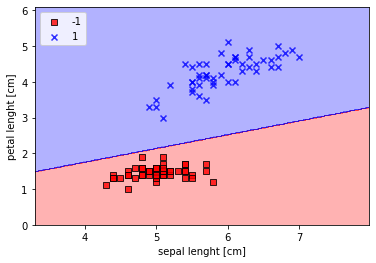

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show()

# 2.3 아달린

- 아달린 규칙과 로젠블라트 퍼셉트론의 가장 큰 차이점은 가중치를 업데이트하는 데 퍼셉트론처럼 단위 계단 함수 대신 선형 활성화 함수를 사용한다는 것
- 활성화 함수의 출력 값을 비교하여 모델의 오차를 계산하고 가중치 업데이트
  
- 목적 함수 : 지도 학습 알고리즘의 핵심 구성 요소는 학습 과정 동안 최적화하기 위해 정의한 함수



In [14]:
class AdalineGD(object):
    """
    적응형 선형 뉴런 분류기

    eta (float): 학습률 ( 0.0 ~ 0.1 )
    n_iter (int): 훈련 데이터셋 반복 횟수
    random_state (int): 가중치 무작위 초기화를 위한 난수 생성기 시드

    w_ (1d-array): 학습된 가중치
    cost_ (list): 에포크마다 누적된 비용 함수의 제곱합
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        X : n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : 타깃 값

        반환값: self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


- 활성화 함수와 비용 함수만 다르고 퍼셉트론과 매우 비슷함

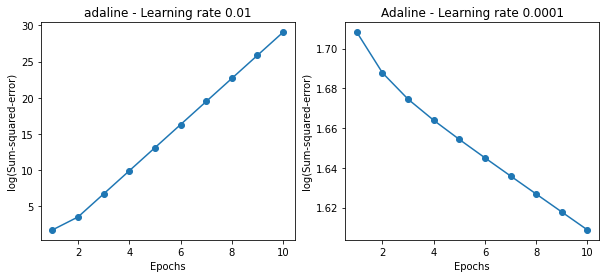

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

- 출력된 비용 함수 그래프에서 두 개의 다른 문제 발생
- 왼쪽 그래프
  - 학습률이 너무 클 때 발생
  - 비용 함수를 최소화하지 못하고 오차는 에포크마다 점점 더 커짐
  - 최솟값 지나침
- 오른족 그래프
  - 비용이 감소하지만 학습률이 너무 작을떄 발생
  - 전역 최소값에 수렴하려면 아주 많은 에포크 필요

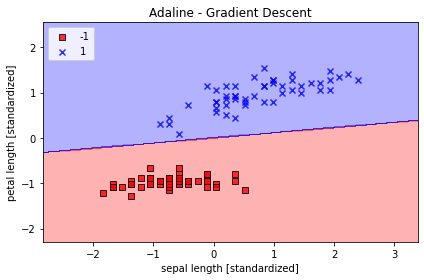

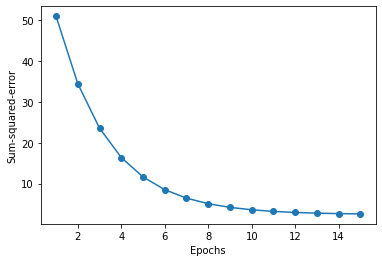

In [28]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

- 표준화를 통해 적절한 학습률을 선택할 수 있음
- 모든 샘플이 완벽하게 분류되더라도 SSE(Sum of Squared Error)가 0이 되지는 않음

In [26]:
class AdalineSGD(object):
    """
    적응형 선형 뉴런 분류기

    eta (float): 학습률 ( 0.0 ~ 0.1 )
    n_iter (int): 훈련 데이터셋 반복 횟수
    shuffle (bool): True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞음
    random_state (int): 가중치 무작위 초기화를 위한 난수 생성기 시드

    w_ (1d-array): 학습된 가중치
    cost_ (list): 에포크마다 누적된 비용 함수의 제곱합
    """

    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        X : n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : 타깃 백터

        반환값: self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터 학습"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 0:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터 섞기"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치 업데이트"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

**fit Method**
- 각 훈련 샘플에 대해 가중치 업데이트

**partial_fit Method**
- 가중치를 다시 초기화하지 않아 온라인 학습에서 사용할 수 있음


훈련 후 알고리즘이 수렴하는지 확인하려고 에포크마다 훈련 샘플의 평균 비용 계산

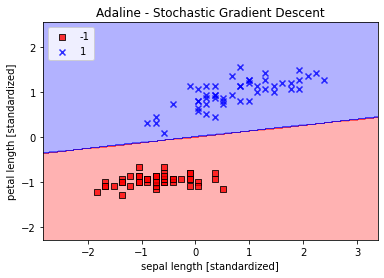

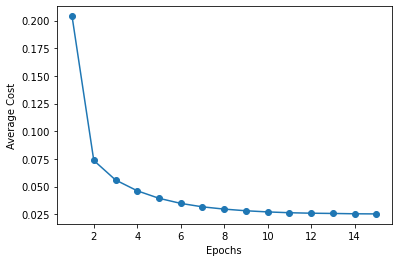

In [29]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

- 평균 비용이 빠르게 감소
- 15번째 에포크 이후 최종 결정 경계는 배치 경사 하강법과 비슷해 보임
- 스트리밍 데이터를 사용하는 온라인 학습 방식으로 모델을 훌녈하려면 개개의 새믈마다 **partial_fit Method** 호출